In [17]:
import pandas as pd
import numpy as np
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
boring = pd.DataFrame()
for i in range(1,5):
  filepath = f'/content/drive/My Drive/Colab Notebooks/Data/Features_Paipa/features_more boring_{i}.csv'
  df_t = pd.read_csv(filepath)
  boring = pd.concat([boring, df_t],axis = 0)
  boring

In [19]:
boring

,image_id,features
0,513e6bf5fdc9f0358700c0cd,"[0.12722249329090118, 0.15796737372875214, 0.0..."
1,5140c876fdc9f0492600223f,"[0.19160804152488708, 0.8231765031814575, 0.11..."
2,50f44859fdc9f065f0003ed5,"[0.32360872626304626, 0.6789833307266235, 0.32..."
3,50f5eeeafdc9f065f00090e4,"[0.16817663609981537, 0.8832595348358154, 0.02..."
4,51408ca1fdc9f0358700eb76,"[0.3580002188682556, 0.23351624608039856, 0.15..."
...,...,...
4995,51414ad6fdc9f04926006feb,"[0.22562137246131897, 1.308432936668396, 0.237..."
4996,513d6ca5fdc9f03587005007,"[0.13413821160793304, 0.9529690146446228, 0.03..."
4997,513d6d76fdc9f0358700515c,"[0.07881231606006622, 0.4931815266609192, 0.13..."
4998,50f56202fdc9f065f0005844,"[0.32366079092025757, 0.5957435965538025, 0.01..."


In [20]:
df_q = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/new_qscores.csv')

# Filter the DataFrame
filtered_df = df_q[df_q['study_question'] == 'more boring']
filtered_df = filtered_df.drop(['_id', 'num_votes', 'place_id', 'study_id'], axis = 1)
df_result = pd.merge(filtered_df, boring, left_on='location_id', right_on = 'image_id')
df_cleaned = df_result.dropna(subset=['features'])
df_cleaned

,location_id,trueskill.score,trueskill.stds.-1,study_question,image_id,features
0,513e6bf5fdc9f0358700c0cd,32.228928,5.215325,more boring,513e6bf5fdc9f0358700c0cd,"[0.12722249329090118, 0.15796737372875214, 0.0..."
1,5140c876fdc9f0492600223f,23.118898,5.933294,more boring,5140c876fdc9f0492600223f,"[0.19160804152488708, 0.8231765031814575, 0.11..."
2,50f44859fdc9f065f0003ed5,28.241849,4.555714,more boring,50f44859fdc9f065f0003ed5,"[0.32360872626304626, 0.6789833307266235, 0.32..."
3,50f5eeeafdc9f065f00090e4,29.774565,4.970651,more boring,50f5eeeafdc9f065f00090e4,"[0.16817663609981537, 0.8832595348358154, 0.02..."
4,51408ca1fdc9f0358700eb76,33.783295,6.452499,more boring,51408ca1fdc9f0358700eb76,"[0.3580002188682556, 0.23351624608039856, 0.15..."
...,...,...,...,...,...,...
19995,51414ad6fdc9f04926006feb,28.338191,5.024266,more boring,51414ad6fdc9f04926006feb,"[0.22562137246131897, 1.308432936668396, 0.237..."
19996,513d6ca5fdc9f03587005007,21.516612,5.491208,more boring,513d6ca5fdc9f03587005007,"[0.13413821160793304, 0.9529690146446228, 0.03..."
19997,513d6d76fdc9f0358700515c,18.436936,6.604048,more boring,513d6d76fdc9f0358700515c,"[0.07881231606006622, 0.4931815266609192, 0.13..."
19998,50f56202fdc9f065f0005844,25.042548,6.189386,more boring,50f56202fdc9f065f0005844,"[0.32366079092025757, 0.5957435965538025, 0.01..."


In [ ]:
# data_frames = {
#     'wealthier': weathier,
#     'more beautiful': beautiful,
#     'livelier': livelier,
#     'more boring': boring,
#     'safer': safer,
#     'more depressing': depressing
# }

# # 存储最终结果的字典
# final_data_frames = {}

# # 遍历每个study_question
# for question, df_to_merge in data_frames.items():
#     # 根据当前的study_question过滤df
#     filtered_df = df[df['study_question'] == question]

#     # 与对应的数据帧合并
#     df_result = pd.merge(filtered_df, df_to_merge, on='image_id')

#     # 清理数据：删除包含空值的行
#     df_cleaned = df_result.dropna(subset=['features'])

#     # 存储清理后的数据帧
#     final_data_frames[question] = df_cleaned

# # 现在final_data_frames字典中包含了每个study_question对应的清理后的数据帧


In [ ]:
# wealthier_df = final_data_frames['wealthier']
# beautiful_df = final_data_frames['more beautiful']
# livelier_df = final_data_frames['livelier']
# boring_df = final_data_frames['more boring']
# safer_df = final_data_frames['safer']
# depressing_df = final_data_frames['more depressing']

In [21]:
df = df_cleaned
df = df.rename(columns={'trueskill.score': 'Q'})
df

,location_id,Q,trueskill.stds.-1,study_question,image_id,features
0,513e6bf5fdc9f0358700c0cd,32.228928,5.215325,more boring,513e6bf5fdc9f0358700c0cd,"[0.12722249329090118, 0.15796737372875214, 0.0..."
1,5140c876fdc9f0492600223f,23.118898,5.933294,more boring,5140c876fdc9f0492600223f,"[0.19160804152488708, 0.8231765031814575, 0.11..."
2,50f44859fdc9f065f0003ed5,28.241849,4.555714,more boring,50f44859fdc9f065f0003ed5,"[0.32360872626304626, 0.6789833307266235, 0.32..."
3,50f5eeeafdc9f065f00090e4,29.774565,4.970651,more boring,50f5eeeafdc9f065f00090e4,"[0.16817663609981537, 0.8832595348358154, 0.02..."
4,51408ca1fdc9f0358700eb76,33.783295,6.452499,more boring,51408ca1fdc9f0358700eb76,"[0.3580002188682556, 0.23351624608039856, 0.15..."
...,...,...,...,...,...,...
19995,51414ad6fdc9f04926006feb,28.338191,5.024266,more boring,51414ad6fdc9f04926006feb,"[0.22562137246131897, 1.308432936668396, 0.237..."
19996,513d6ca5fdc9f03587005007,21.516612,5.491208,more boring,513d6ca5fdc9f03587005007,"[0.13413821160793304, 0.9529690146446228, 0.03..."
19997,513d6d76fdc9f0358700515c,18.436936,6.604048,more boring,513d6d76fdc9f0358700515c,"[0.07881231606006622, 0.4931815266609192, 0.13..."
19998,50f56202fdc9f065f0005844,25.042548,6.189386,more boring,50f56202fdc9f065f0005844,"[0.32366079092025757, 0.5957435965538025, 0.01..."


In [22]:
# 设置δ值为0.5
delta = 0.6


# 计算Q值的平均值和标准差
mu = df['Q'].mean()
sigma = df['Q'].std()

# 定义阈值
lower_threshold = mu - delta * sigma
upper_threshold = mu + delta * sigma

# 创建一个新列用于二元分类标签
df['Q_label'] = np.where(df['Q'] <= lower_threshold, -1,
                          np.where(df['Q'] >= upper_threshold, 1, np.nan))
print(df.head())
# 删除噪声数据（介于两个阈值之间的Q值）
df = df.dropna(subset=['Q_label'])
# 输出结果
print(f"Processed with δ = {delta}:")
print(f"Lower Threshold: {lower_threshold}, Upper Threshold: {upper_threshold}")

                location_id          Q  trueskill.stds.-1 study_question  \
0  513e6bf5fdc9f0358700c0cd  32.228928           5.215325    more boring   
1  5140c876fdc9f0492600223f  23.118898           5.933294    more boring   
2  50f44859fdc9f065f0003ed5  28.241849           4.555714    more boring   
3  50f5eeeafdc9f065f00090e4  29.774565           4.970651    more boring   
4  51408ca1fdc9f0358700eb76  33.783295           6.452499    more boring   

                   image_id  \
0  513e6bf5fdc9f0358700c0cd   
1  5140c876fdc9f0492600223f   
2  50f44859fdc9f065f0003ed5   
3  50f5eeeafdc9f065f00090e4   
4  51408ca1fdc9f0358700eb76   

                                            features  Q_label  
0  [0.12722249329090118, 0.15796737372875214, 0.0...      1.0  
1  [0.19160804152488708, 0.8231765031814575, 0.11...      NaN  
2  [0.32360872626304626, 0.6789833307266235, 0.32...      1.0  
3  [0.16817663609981537, 0.8832595348358154, 0.02...      1.0  
4  [0.3580002188682556, 0.2335162460

In [23]:
df

,location_id,Q,trueskill.stds.-1,study_question,image_id,features,Q_label
0,513e6bf5fdc9f0358700c0cd,32.228928,5.215325,more boring,513e6bf5fdc9f0358700c0cd,"[0.12722249329090118, 0.15796737372875214, 0.0...",1.0
2,50f44859fdc9f065f0003ed5,28.241849,4.555714,more boring,50f44859fdc9f065f0003ed5,"[0.32360872626304626, 0.6789833307266235, 0.32...",1.0
3,50f5eeeafdc9f065f00090e4,29.774565,4.970651,more boring,50f5eeeafdc9f065f00090e4,"[0.16817663609981537, 0.8832595348358154, 0.02...",1.0
4,51408ca1fdc9f0358700eb76,33.783295,6.452499,more boring,51408ca1fdc9f0358700eb76,"[0.3580002188682556, 0.23351624608039856, 0.15...",1.0
5,50f5eb4cfdc9f065f00081ec,34.547447,5.764187,more boring,50f5eb4cfdc9f065f00081ec,"[0.29232650995254517, 0.8428317308425903, 0.04...",1.0
...,...,...,...,...,...,...,...
19994,5140ca7efdc9f0492600285f,17.305222,6.380341,more boring,5140ca7efdc9f0492600285f,"[0.3504727780818939, 1.4056956768035889, 0.237...",-1.0
19995,51414ad6fdc9f04926006feb,28.338191,5.024266,more boring,51414ad6fdc9f04926006feb,"[0.22562137246131897, 1.308432936668396, 0.237...",1.0
19996,513d6ca5fdc9f03587005007,21.516612,5.491208,more boring,513d6ca5fdc9f03587005007,"[0.13413821160793304, 0.9529690146446228, 0.03...",-1.0
19997,513d6d76fdc9f0358700515c,18.436936,6.604048,more boring,513d6d76fdc9f0358700515c,"[0.07881231606006622, 0.4931815266609192, 0.13...",-1.0


In [ ]:
# # 设置δ值为1.2
# delta = 1.2

# # 待处理的DataFrame列表
# df_list = [('livelier_df', livelier_df), ('boring_df', boring_df), ('depressing_df', depressing_df)]

# # 循环处理每个DataFrame
# for df_name, df in df_list:
#     # 计算Q值的平均值和标准差
#     mu = df['Q'].mean()
#     sigma = df['Q'].std()

#     # 定义阈值
#     lower_threshold = mu - delta * sigma
#     upper_threshold = mu + delta * sigma

#     # 创建一个新列用于二元分类标签
#     df['Q_label'] = np.where(df['Q'] <= lower_threshold, -1,
#                              np.where(df['Q'] >= upper_threshold, 1, np.nan))

#     # 删除噪声数据
#     df=df.dropna(subset=['Q_label'], inplace=True)

#     # 输出结果
#     print(f"Processed {df_name} with δ = {delta}:")
#     print(f"Lower Threshold: {lower_threshold}, Upper Threshold: {upper_threshold}")


Processed livelier_df with δ = 1.2:
Lower Threshold: -2.4043229957803254, Upper Threshold: 16.590829439356263
Processed boring_df with δ = 1.2:
Lower Threshold: -0.6780187546785381, Upper Threshold: 20.254198673204577
Processed depressing_df with δ = 1.2:
Lower Threshold: -0.7635875943044912, Upper Threshold: 19.973010452356952


In [24]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [25]:
# 检查列的数据类型
print(df['features'].dtype)

# 输出前几个元素以确定它们的格式
print(df['features'].head())

object
0    [0.12722249329090118, 0.15796737372875214, 0.0...
2    [0.32360872626304626, 0.6789833307266235, 0.32...
3    [0.16817663609981537, 0.8832595348358154, 0.02...
4    [0.3580002188682556, 0.23351624608039856, 0.15...
5    [0.29232650995254517, 0.8428317308425903, 0.04...
Name: features, dtype: object


In [26]:
# 假设 safer_df 是您的DataFrame，且包含 'features' 和 'Q_label' 列
# 将字符串表示的数字列表转换为真正的浮点数列表
df['features'] = df['features'].apply(lambda x: [float(i) for i in x.strip('[]').split(', ')])

# 提取特征和标签
X = pd.DataFrame(df['features'].tolist())  # 假设特征已经是列表格式
y = df['Q_label']

# 分割数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 特征缩放
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 训练SVM模型
svm_model = SVC(kernel='rbf')  # 使用RBF核
svm_model.fit(X_train_scaled, y_train)

# 进行预测
y_pred = svm_model.predict(X_test_scaled)

# 评估模型
print(classification_report(y_test, y_pred))


<ipython-input-26-fa01ee28a912>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['features'] = df['features'].apply(lambda x: [float(i) for i in x.strip('[]').split(', ')])


              precision    recall  f1-score   support

        -1.0       0.62      0.62      0.62      1191
         1.0       0.60      0.60      0.60      1138

    accuracy                           0.61      2329
   macro avg       0.61      0.61      0.61      2329
weighted avg       0.61      0.61      0.61      2329



预测Paipa

In [27]:
final = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/cll_niuzi.csv')
final

,Unnamed: 0,OID_,features,POINT_X,POINT_Y
0,0,5205,"[0.266784131526947, 1.2442797422409058, 0.3355...",-73.110276,5.778463
1,1,5206,"[0.6613556742668152, 0.7590034604072571, 0.288...",-73.110219,5.778415
2,2,5207,"[0.5054644346237183, 0.9782446026802063, 0.316...",-73.110133,5.778435
3,3,5208,"[0.6890900135040283, 1.1312485933303833, 0.525...",-73.110046,5.778456
4,4,5209,"[0.4193248450756073, 0.8977274894714355, 0.299...",-73.109960,5.778477
...,...,...,...,...,...
15245,16969,16954,"[0.3880627751350403, 1.5375115871429443, 0.160...",-73.109614,5.774251
15246,16970,16955,"[0.2674499750137329, 1.420997142791748, 0.0758...",-73.109558,5.774182
15247,16971,16972,"[0.13584919273853302, 0.5921735763549805, 0.03...",-73.108701,5.772968
15248,16972,16970,"[0.2558000385761261, 1.0976775884628296, 0.153...",-73.108787,5.773115


In [28]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# 假设之前的scaler和svm_model已经被训练并且导入

# 转换 features 列的字符串表示的数字列表为真正的浮点数列表
final['features'] = final['features'].apply(lambda x: [float(i) for i in x.strip('[]').split(', ')])

# 将特征转换为适合模型的格式
X_new = pd.DataFrame(final['features'].tolist())

# 使用训练时的scaler对象来缩放新特征
X_new_scaled = scaler.transform(X_new)

# 使用模型进行预测
y_new_pred = svm_model.predict(X_new_scaled)

# 将预测结果添加到DataFrame中（如果需要的话）
final['Q_pred'] = y_new_pred

final

,Unnamed: 0,OID_,features,POINT_X,POINT_Y,Q_pred
0,0,5205,"[0.266784131526947, 1.2442797422409058, 0.3355...",-73.110276,5.778463,1.0
1,1,5206,"[0.6613556742668152, 0.7590034604072571, 0.288...",-73.110219,5.778415,1.0
2,2,5207,"[0.5054644346237183, 0.9782446026802063, 0.316...",-73.110133,5.778435,1.0
3,3,5208,"[0.6890900135040283, 1.1312485933303833, 0.525...",-73.110046,5.778456,1.0
4,4,5209,"[0.4193248450756073, 0.8977274894714355, 0.299...",-73.109960,5.778477,1.0
...,...,...,...,...,...,...
15245,16969,16954,"[0.3880627751350403, 1.5375115871429443, 0.160...",-73.109614,5.774251,1.0
15246,16970,16955,"[0.2674499750137329, 1.420997142791748, 0.0758...",-73.109558,5.774182,1.0
15247,16971,16972,"[0.13584919273853302, 0.5921735763549805, 0.03...",-73.108701,5.772968,1.0
15248,16972,16970,"[0.2558000385761261, 1.0976775884628296, 0.153...",-73.108787,5.773115,1.0


In [29]:
points = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/points.csv')
points

,OID_,POINT_X,POINT_Y
0,1,-73.117803,5.783468
1,2,-73.117801,5.783558
2,3,-73.117800,5.783648
3,4,-73.117798,5.783737
4,5,-73.117796,5.783827
...,...,...,...
16970,16971,-73.108744,5.773042
16971,16972,-73.108701,5.772968
16972,16973,-73.108658,5.772895
16973,16974,-73.108615,5.772821


In [30]:
# 创建一个新列'image_id_num'，包含'image_id'中第一个下划线之前的数字
# 先将字符串转换为浮点数，然后转换为整数
#final['image_id_num'] = final['image_id'].apply(lambda x: int(float(x.split('_')[0])))

# 根据 'image_id_num' 和 'OID_' 进行合并
merged_df = final.merge(points, left_on='OID_', right_on='OID_')
merged_df = merged_df.rename(columns={'POINT_X_x': 'POINT_X', 'POINT_Y_x': 'POINT_Y'})
merged_df

,Unnamed: 0,OID_,features,POINT_X,POINT_Y,Q_pred,POINT_X_y,POINT_Y_y
0,0,5205,"[0.266784131526947, 1.2442797422409058, 0.3355...",-73.110276,5.778463,1.0,-73.110276,5.778463
1,1,5206,"[0.6613556742668152, 0.7590034604072571, 0.288...",-73.110219,5.778415,1.0,-73.110219,5.778415
2,2,5207,"[0.5054644346237183, 0.9782446026802063, 0.316...",-73.110133,5.778435,1.0,-73.110133,5.778435
3,3,5208,"[0.6890900135040283, 1.1312485933303833, 0.525...",-73.110046,5.778456,1.0,-73.110046,5.778456
4,4,5209,"[0.4193248450756073, 0.8977274894714355, 0.299...",-73.109960,5.778477,1.0,-73.109960,5.778477
...,...,...,...,...,...,...,...,...
15245,16969,16954,"[0.3880627751350403, 1.5375115871429443, 0.160...",-73.109614,5.774251,1.0,-73.109614,5.774251
15246,16970,16955,"[0.2674499750137329, 1.420997142791748, 0.0758...",-73.109558,5.774182,1.0,-73.109558,5.774182
15247,16971,16972,"[0.13584919273853302, 0.5921735763549805, 0.03...",-73.108701,5.772968,1.0,-73.108701,5.772968
15248,16972,16970,"[0.2558000385761261, 1.0976775884628296, 0.153...",-73.108787,5.773115,1.0,-73.108787,5.773115


In [31]:
new_df=merged_df[['Q_pred','OID_','POINT_X','POINT_Y']]
new_df

,Q_pred,OID_,POINT_X,POINT_Y
0,1.0,5205,-73.110276,5.778463
1,1.0,5206,-73.110219,5.778415
2,1.0,5207,-73.110133,5.778435
3,1.0,5208,-73.110046,5.778456
4,1.0,5209,-73.109960,5.778477
...,...,...,...,...
15245,1.0,16954,-73.109614,5.774251
15246,1.0,16955,-73.109558,5.774182
15247,1.0,16972,-73.108701,5.772968
15248,1.0,16970,-73.108787,5.773115


In [32]:
new_df.to_csv('/content/drive/My Drive/Colab Notebooks/Data/perceptions_export/final_boring.csv', index=False)

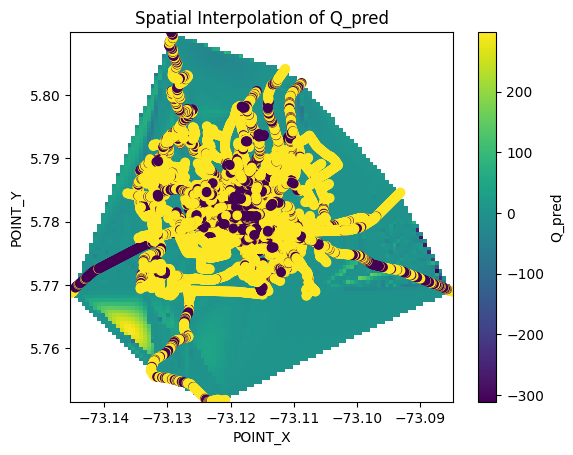

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# 假设已经有一个DataFrame 'df' 包含 'POINT_X', 'POINT_Y', 和 'Q_pred'列

# 创建网格用于插值
grid_x, grid_y = np.mgrid[
    min(merged_df['POINT_X']):max(merged_df['POINT_X']):100j,
    min(merged_df['POINT_Y']):max(merged_df['POINT_Y']):100j
]

# 插值
grid_z = griddata(
    merged_df[['POINT_X', 'POINT_Y']].values,
    merged_df['Q_pred'].values,
    (grid_x, grid_y),
    method='cubic'
)

# 绘制原始点
plt.scatter(merged_df['POINT_X'], merged_df['POINT_Y'], c=merged_df['Q_pred'], cmap='viridis')

# 绘制插值结果
plt.imshow(grid_z.T, extent=(min(merged_df['POINT_X']), max(merged_df['POINT_X']), min(merged_df['POINT_Y']), max(merged_df['POINT_Y'])), origin='lower', cmap='viridis')
plt.colorbar(label='Q_pred')

# 设置图表标题和标签
plt.title('Spatial Interpolation of Q_pred')
plt.xlabel('POINT_X')
plt.ylabel('POINT_Y')

# 显示绘图
plt.show()
